## Affiliative Questionnaire

## Import packages 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import *
import pingouin as pg

## Function creation

1. reverseScoring: Reserse scores likert scales. It requires three arguments:
    - **df** = your data frame,
    - **high** = 1 + highest score available
    - **cols** = the columns you want reversed in list form

In [2]:
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
Parameters
-------------
     df: your data frame,
     high: 1 + highest score available
     cols: the columns you want reversed in list form
Returns
------------
     dataFrame '''
    
    df[cols] = 1 + high - df[cols]
    return df

2. indexNans: Gets the row index of Nans cointained in a dataFrame
    - **df**= Your data Frame

In [3]:
def indexNans(df):
    '''Get row index of all Nans in a data frame
Parameters
----------
    df:  Data frame
Returns
-------
    List
'''
    booleanMaskNaNs = df.isna() #Dataframe with boolen of NaNs
    rowsWithNaNs = df[(booleanMaskNaNs == 1).any(axis=1)] # Keeps only rows with NaNs
    index = rowsWithNaNs.index # Gets index of rows with NaNs
    return list(index)

3.dataImputation: Fills in Nan and changes them for the average score of the subject on the scale:
    - **DF** = Data frame for imputation

In [4]:
def Imputation(DF=None):
    '''Replace NaN values with subject average
    Parameters
----------
    df:  Data frame
Returns
-------
    Data frame'''
    index = indexNans(DF)
    for row in DF.iterrows():
        for element in index: 
            DF.loc[element] = DF.loc[element].fillna(round(DF.iloc[element,2:6].mean()))   
    return DF 

## Preprocessing 

In [5]:
# Data set loading
df_file = "E:/HumanA/Data/Data_Tracy/Questionnaires/AffiliativeQuest.csv"
df = pd.read_csv(df_file, sep= ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Timestamp                                               22 non-null     object
 1   ID                                                      22 non-null     int64 
 2   1. I prefer to work in group instead of by myself ​     22 non-null     int64 
 3   2. I spend a lot of time talking to others              22 non-null     int64 
 4   3. I like to study with groups rather than by myself​   22 non-null     int64 
 5   4. I try to work alone ​                                22 non-null     int64 
 6   5. I prefer to work on my own and let others do theirs  22 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ KB


In [6]:
#Renaming the column names 
column_names = ['timeStamp', 'ID', 'item1', 'item2', 'item3', 'item4', 'item5']
df.columns = column_names
df.head()

,timeStamp,ID,item1,item2,item3,item4,item5
0,11/17/2022 17:33:08,9627,4,3,1,5,5
1,11/21/2022 15:27:48,4598,4,5,4,5,5
2,11/22/2022 15:49:44,1031,3,7,2,5,6
3,11/24/2022 11:50:55,8629,6,6,7,4,2
4,11/25/2022 9:47:14,4847,3,5,2,4,4


In [7]:
#Recodifying the negatively phrased items 
reverseScoring(df,7,['item4','item5'])

,timeStamp,ID,item1,item2,item3,item4,item5
0,11/17/2022 17:33:08,9627,4,3,1,3,3
1,11/21/2022 15:27:48,4598,4,5,4,3,3
2,11/22/2022 15:49:44,1031,3,7,2,3,2
3,11/24/2022 11:50:55,8629,6,6,7,4,6
4,11/25/2022 9:47:14,4847,3,5,2,4,4
5,12/2/2022 14:15:21,5766,2,4,2,3,3
6,12/8/2022 11:52:16,9297,4,7,3,3,3
7,12/12/2022 11:03:42,7081,4,7,3,2,3
8,12/12/2022 15:38:23,5189,5,4,6,5,5
9,12/14/2022 10:31:31,5743,6,6,5,6,5


In [8]:
df1 = Imputation(df)
df1.head()

,timeStamp,ID,item1,item2,item3,item4,item5
0,11/17/2022 17:33:08,9627,4,3,1,3,3
1,11/21/2022 15:27:48,4598,4,5,4,3,3
2,11/22/2022 15:49:44,1031,3,7,2,3,2
3,11/24/2022 11:50:55,8629,6,6,7,4,6
4,11/25/2022 9:47:14,4847,3,5,2,4,4


In [9]:
# Calculating the average for all context items 
df1['AffiliativeQ_average'] = df1[['item1', 'item2', 'item3','item4','item5']].mean(axis=1)
df1.head()

,timeStamp,ID,item1,item2,item3,item4,item5,AffiliativeQ_average
0,11/17/2022 17:33:08,9627,4,3,1,3,3,2.8
1,11/21/2022 15:27:48,4598,4,5,4,3,3,3.8
2,11/22/2022 15:49:44,1031,3,7,2,3,2,3.4
3,11/24/2022 11:50:55,8629,6,6,7,4,6,5.8
4,11/25/2022 9:47:14,4847,3,5,2,4,4,3.6


## Write to CSV

In [10]:
os.chdir('E:/HumanA/Data/Data_Tracy/Questionnaires/Adjusted')
df1.to_csv('AffilliativeTend.csv')

In [11]:
# From a wide format to a long format 
Long = pd.melt(df1, id_vars=['ID'], value_vars=['item1', 'item2', 'item3', 'item4', 'item5', 'AffiliativeQ_average'], var_name='item', value_name='score')
Long.head()

,ID,item,score
0,9627,item1,4.0
1,4598,item1,4.0
2,1031,item1,3.0
3,8629,item1,6.0
4,4847,item1,3.0


In [12]:
Affiliative = df1[['item1', 'item2', 'item3', 'item4', 'item5']]
pg.cronbach_alpha(data=Affiliative, ci=.99)

(0.7966005476524409, array([0.543, 0.927]))

## Data Visualization

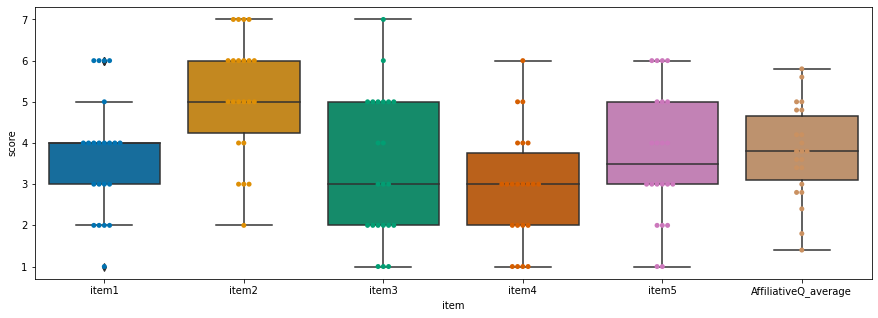

In [13]:
sns.set_palette('colorblind')
dy='item'; dx='score'; data=Long
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data= data, x=dy, y=dx, ax=ax)
sns.swarmplot(data= data, x=dy, y=dx, ax=ax)
plt.show()


In [14]:
data.describe()

,ID,score
count,132.000000,132.000000
mean,5242.181818,3.772727
std,2512.300900,1.598047
min,1031.000000,1.000000
25%,3540.000000,2.950000
50%,5466.000000,4.000000
75%,7081.000000,5.000000
max,9627.000000,7.000000


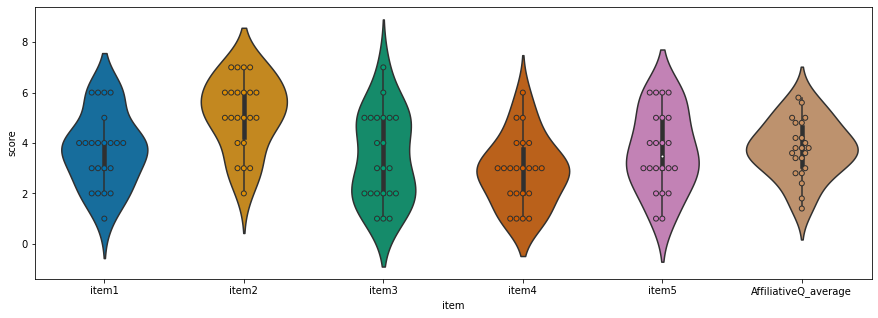

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data= Long, x=dy, y=dx, ax=ax)
sns.swarmplot(data= Long, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()